**Import libraries**

In [2]:
import nltk
from nltk import word_tokenize
from nltk.corpus import brown as cb
from nltk.corpus import treebank as tb
import sklearn
from sklearn.metrics import classification_report
import pprint
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
nltk.download('treebank')
nltk.download('punkt')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
text = nltk.Text(tb.words()[0:10])
print(text)

<Text: Pierre Vinken , 61 years old , will...>


In [4]:
print(tb.words())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]


In [5]:
tb_corpus = nltk.corpus.treebank.tagged_sents()
pprint.pprint(tb_corpus)

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]


In [6]:
print("Len tagged sentences: ", len(tb_corpus))

Len tagged sentences:  3914


In [7]:
print("Len tagged words:", len(nltk.corpus.treebank.tagged_words()))


Len tagged words: 100676


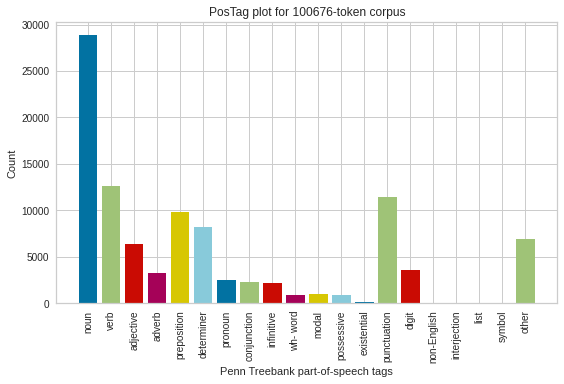

In [8]:
from yellowbrick.text import PosTagVisualizer

viz = PosTagVisualizer()
treebank = []
treebank.append(tb_corpus)
viz.fit(treebank)
viz.show()

**Function that extract features from words**

In [9]:
def features(sentence, index):
    return {
    'word': sentence[index],
    'is_first': index == 0,
    'is_last': index == len(sentence) - 1,
    'is_capitalized': sentence[index][0].upper() == sentence[index][0],
    'is_all_caps': sentence[index].upper() == sentence[index],
    'is_all_lower': sentence[index].lower() == sentence[index],
    'prefix-1': sentence[index][0],
    'prefix-2': sentence[index][:2],
    'prefix-3': sentence[index][:3],
    'suffix-1': sentence[index][-1],
    'suffix-2': sentence[index][-2:],
    'suffix-3': sentence[index][-3:],
    'prev_word': '' if index == 0 else sentence[index - 1],
    'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
    'has_hyphen': '-' in sentence[index],
    'is_numeric': sentence[index].isdigit(),
    'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

**Check the function**

In [10]:
pprint.pprint(features(['I', 'am', 'a', 'student'], 3))

{'capitals_inside': False,
 'has_hyphen': False,
 'is_all_caps': False,
 'is_all_lower': True,
 'is_capitalized': False,
 'is_first': False,
 'is_last': True,
 'is_numeric': False,
 'next_word': '',
 'prefix-1': 's',
 'prefix-2': 'st',
 'prefix-3': 'stu',
 'prev_word': 'a',
 'suffix-1': 't',
 'suffix-2': 'nt',
 'suffix-3': 'ent',
 'word': 'student'}


**Function that extract words form tagged sentences**




In [11]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

**Function that transform dataset where X = Features Y = POS labels**

In [12]:
def transform_to_dataset(tagged_sentences):
    X, y = [], []   #initialize two empty lists
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
    return X, y

**Split dataset in training and testing**

In [13]:
split = int(0.8 * len(tb_corpus))
training_sentences = tb_corpus[:split]
test_sentences = tb_corpus[split:]

In [14]:
print("Len of train set: ", len(training_sentences))
print("Len of test set: ", len(test_sentences))

Len of train set:  3131
Len of test set:  783


In [15]:
X_train, y_train = transform_to_dataset(training_sentences)

In [16]:
print(len(X_train)) 
print(len(y_train))

80637
80637


In [17]:
clf = Pipeline([
    ('vectorizer', DictVectorizer()),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,),
    activation= 'relu',solver= 'adam',alpha= 0.0001,learning_rate='constant'))

    # ('classifier', SVC(kernel = 'linear'))
    # ('classifier', DecisionTreeClassifier(criterion= 'gini'))
])

In [19]:
print(X_train[:2000])

[{'word': 'Pierre', 'is_first': True, 'is_last': False, 'is_capitalized': True, 'is_all_caps': False, 'is_all_lower': False, 'prefix-1': 'P', 'prefix-2': 'Pi', 'prefix-3': 'Pie', 'suffix-1': 'e', 'suffix-2': 're', 'suffix-3': 'rre', 'prev_word': '', 'next_word': 'Vinken', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': 'Vinken', 'is_first': False, 'is_last': False, 'is_capitalized': True, 'is_all_caps': False, 'is_all_lower': False, 'prefix-1': 'V', 'prefix-2': 'Vi', 'prefix-3': 'Vin', 'suffix-1': 'n', 'suffix-2': 'en', 'suffix-3': 'ken', 'prev_word': 'Pierre', 'next_word': ',', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': ',', 'is_first': False, 'is_last': False, 'is_capitalized': True, 'is_all_caps': True, 'is_all_lower': True, 'prefix-1': ',', 'prefix-2': ',', 'prefix-3': ',', 'suffix-1': ',', 'suffix-2': ',', 'suffix-3': ',', 'prev_word': 'Vinken', 'next_word': '61', 'has_hyphen': False, 'is_numeric': False, 'capitals_i

In [20]:
# I only use the first 20K samples because of my computational power
clf.fit(X_train[:20000],y_train[:20000]) 

Pipeline(steps=[('vectorizer', DictVectorizer()),
                ('classifier', MLPClassifier())])

In [21]:
X_test, y_test = transform_to_dataset(test_sentences)

In [22]:
y_pred=clf.predict(X_test)
print("Test Data")
print("F1 score", sklearn.metrics.f1_score(y_test, y_pred,average='weighted',labels=clf.classes_))
print("Recall", sklearn.metrics.recall_score(y_test, y_pred,average='weighted',labels=clf.classes_))
print("Precision", sklearn.metrics.precision_score(y_test, y_pred,average='weighted',labels=clf.classes_))

Test Data
F1 score 0.9351396847412354
Recall 0.9358187353396217
Precision 0.9384433014585356


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
y_train_pred=clf.predict(X_train)
print("Train Data")
print("F1 score", sklearn.metrics.f1_score(y_train, y_train_pred,average='weighted',labels=clf.classes_))
print("Recall", sklearn.metrics.recall_score(y_train, y_train_pred,average='weighted',labels=clf.classes_))
print("Precision", sklearn.metrics.precision_score(y_train, y_train_pred,average='weighted',labels=clf.classes_))

Train Data
F1 score 0.9471890913216506
Recall 0.9478966368519645
Precision 0.9477802274150039


In [24]:
# the class score that helps us see which classes need to be improved

print("Class score:")
print(sklearn.metrics.classification_report(y_test, y_pred, labels=clf.classes_))

Class score:
              precision    recall  f1-score   support

           $       1.00      1.00      1.00       242
          ''       1.00      1.00      1.00        78
           ,       1.00      1.00      1.00       930
       -LRB-       1.00      1.00      1.00        26
      -NONE-       1.00      1.00      1.00      1340
       -RRB-       1.00      1.00      1.00        26
           .       1.00      1.00      1.00       762
           :       1.00      1.00      1.00        77
          CC       1.00      0.99      1.00       429
          CD       0.99      0.99      0.99      1032
          DT       0.99      0.99      0.99      1611
          EX       0.78      1.00      0.88         7
          FW       0.00      0.00      0.00         0
          IN       0.97      0.97      0.97      1952
          JJ       0.75      0.84      0.79      1087
         JJR       0.87      0.59      0.70        76
         JJS       0.72      0.74      0.73        38
          MD  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

[1.         1.         1.         1.         1.         1.
 1.         1.         0.9953271  0.99027237 0.99224806 0.875
 0.         0.97284836 0.79391304 0.703125   0.72727273 0.98029557
 0.9025641  0.92809735 0.11764706 0.93604405 0.         0.99489796
 0.99775281 0.99588477 0.82892057 0.42857143 0.5        0.56818182
 0.99892357 0.         0.9118541  0.8956044  0.88224299 0.8361204
 0.77018634 0.90081301 0.94581281 1.         1.         0.96153846
 1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<BarContainer object of 43 artists>

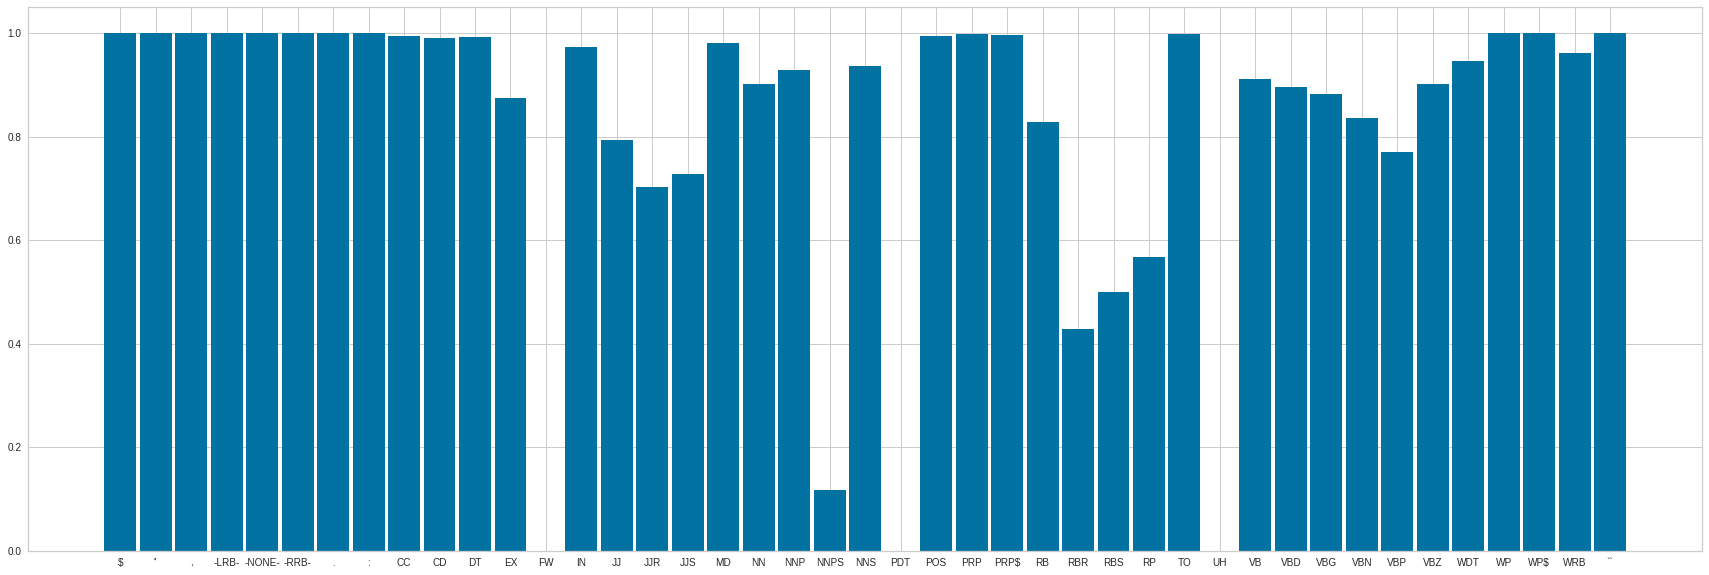

In [25]:
precision, recall, fscore, support = score(y_test, y_pred, labels=clf.classes_)
print(fscore)


figure(figsize=(30,10))
plt.bar(clf.classes_, height = fscore, width= 0.9,align= 'center')

In [28]:
print ("Accuracy on test:", (clf.score(X_test, y_test)))
print ("Accuracy on train:", (clf.score(X_train, y_train)))

Accuracy on test: 0.9357253355955886
Accuracy on train: 0.9475674938303756


In [29]:
def pos_tag(sentence):
    tagged_sentence = []
    tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
    return zip(sentence, tags)

**POS tagging given sentences**

In [30]:
sentence = list(pos_tag(word_tokenize('Tomorrow I will have a meeting with Maria.')))
for i in sentence:
    print((u"{:<16}{:>2}".format(str(i[0]),str(i[1])))) 

Tomorrow        NN
I               PRP
will            MD
have            VB
a               DT
meeting         NN
with            IN
Maria           NNP
.                .


In [31]:
sentence2 = list(pos_tag(word_tokenize("Last summer I went to the mountains with my friends.")))
for j in sentence2:
    print(u"{:<16}{:>2}".format(str(j[0]),str(j[1])))  

Last            JJ
summer          NN
I               PRP
went            VBD
to              TO
the             DT
mountains       NNS
with            IN
my              PRP$
friends         NNS
.                .


In [32]:
sentence3 = list(pos_tag(word_tokenize('I am going to help my uncle Billy with some technical issues with his laptop.')))
for k in sentence3:
    print(u"{:<16}{:>2}".format(str(k[0]),str(k[1]))) 

I               PRP
am              NN
going           VBG
to              TO
help            VB
my              PRP$
uncle           JJ
Billy           RB
with            IN
some            DT
technical       JJ
issues          NNS
with            IN
his             PRP$
laptop          NN
.                .
